# Predicting Stroke Risk and Enhancing Patient Safety Using Supervised Machine Learning.

## Problem Statement
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Stroke is a major public health issue. Early detection of high-risk individuals and risk factors associated with stroke can guide preventive interventions and public health actions to control the disease. This project applies supervised machine learning techniques to predict stroke occurrence using healthcare data. 

### Business problem
Without a high-recall predictive system, high-risk patients remain "hidden" in the healthcare system until a life-threatening event occurs, leading to avoidable mortality and huge healthcare costs that could be avoided by early detection.

### Stakeholders
* Healthcare providers
* Epidemiologists and Public Health Personnel
* Insurance Organization


### Main Objective
To build and evaluate supervised machine learning models for stroke classification using healthcare data.

#### Specific Objectives
* **Identify Risk Factors:** Determine which demographic and clinical variables most strongly correlate with stroke.
* **Optimize for Recall:** Achieve a minimum **90% Recall** to minimize false negatives (missed diagnoses).
* **Clinical Utility:** Provide a model that serves as an effective early-warning screening tool.

The data used is obtained from ([kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)).

### **1.0 Importing Libraries and Data Loading**
- Importing the libraries
- Loading the data and data understanding

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc

In [2]:
# Load the data
df = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **2.0 Data Understanding and Exploratory Data Analysis**
Examining the data, distribution of features and especially the target variable stroke.

#### 2.1 Structure of the dataframe
Observing the shape, null values, duplicates and datatypes of the variables in the dataframe.

In [3]:
# Last 5 rows of the dataframe
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
# Shape of the dataframe
df.shape

(5110, 11)

In [5]:
# Columns with null values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Duplicates in the df
df.duplicated().value_counts()

False    5110
dtype: int64

In [7]:
# Datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Summary

- The dataset contains 5110 rows and 11 columns.
- There are no duplicates in the dataset.
- The column `bmi` has 201 missing values.
- 3 columns (`hypertension`, `heart_disease` and `stroke`) have been label encoded already.
- `age`, `avg_glucose_level` and `bmi` are numerical columns while all the other columns are categorical.

In [8]:
# Desciption of numerical columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Fill missing values of the 'bmi' column with the mean
df['bmi'] = df['bmi'].fillna(value=df['bmi'].median())
df['bmi'].isna().sum()

0

The data is clean, there are no missing values and all the data types are correct.

#### 2.2 Exploratory Data Analysis (EDA) & Risk Factor Identification
Analyzing the relationship between patient attributes and stroke occurrence. This helps visually identify potential **risk factors** before feeding the data into the machine learning models.

Focus is on:
1. Do conditions like hypertension or smoking status correlate with higher stroke rates?
2. How does age and glucose levels differ between stroke and non-stroke patients?

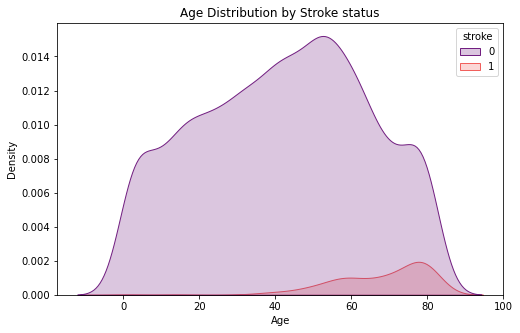

In [10]:
# 1. Risk Factor: Age
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, palette='magma')
plt.title('Age Distribution by Stroke status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Summary

There is a strong correlation between age and stroke status. - Most stroke cases happen in older people, around 60–80 years old.  
- Younger people rarely have strokes.  
- There are more people without stroke than with stroke.  

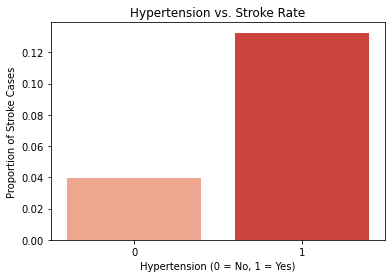

In [11]:
# 2. Risk Factor: Hypertension 
# Calculate stroke proportion per hypertension category
ht_risk = df.groupby('hypertension')['stroke'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(
    data=ht_risk,
    x='hypertension',
    y='stroke',
    palette='Reds'
)
plt.title('Hypertension vs. Stroke Rate')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.show()

Summary

Hypertension as a major risk factor for stroke within this dataset. Individuals with hypertension have a higher stroke rate than those without hypertension. 

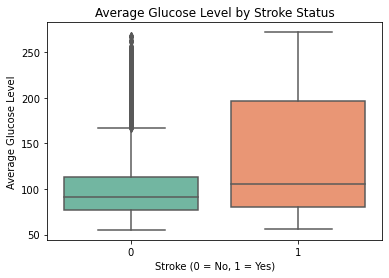

In [12]:
# 3. Risk Factor: Average Glucose Level
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='stroke',
    y='avg_glucose_level',
    palette='Set2'
)
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.show()

Summary

High glucose is a risk factor for stroke, but it doesn’t cause a stroke immediately.  
- People without stroke mostly have glucose below 125.  
- People who had a stroke tend to have higher glucose levels, showing a strong link between sustained high glucose and stroke.


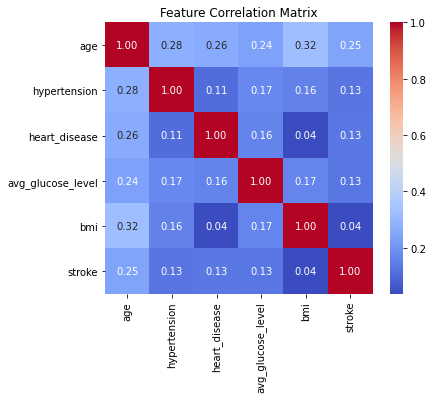

In [13]:
# 4. Correlation Heatmap (Overall Relationship)
# Select numerical columns for correlation
corr = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title('Feature Correlation Matrix')
plt.show()

All these factors have a weak positive correlation with stroke.

In [14]:
# Calculating Cramér's V for categorical variables
# This will tell the strength of the association between each factor and a stroke.
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramér's V for two categorical series. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction for small samples 
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of your categorical variables
cat_vars = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dictionary to store results
results = {}

for var in cat_vars:
    results[var] = cramers_v(df[var], df['stroke'])

# Display results as a sorted Series
v_results = pd.Series(results).sort_values(ascending=False)
print(v_results)

ever_married      0.106478
work_type         0.094020
smoking_status    0.071539
Residence_type    0.003993
gender            0.000000
dtype: float64


Summary 

- Marriage appears important only because it’s compounded by age.  
- Lifestyle factors matter a little: Work type and smoking have a small effect on stroke.  
- Gender and residence have almost no impact on stroke risk.

Stroke Risk Factors:

**High Risk-** Age, Hypertension, High Glucose  
**Moderate Risk-** Ever Married, Work Type, Smoking, Heart Disease  
**Low/No Risk-** Gender, Residence, BMI

#### **3.0 Preprocessing data**
Preparing data for machine learning by:
1. **Splitting data:** Splitting the data into train set and the test set.
2. **Scaling:** Normalizing numerical features so that the scale does not cause model bias.
3.  **Encoding:** Converting categorical strings into numerical using OneHot Encoding.



In [15]:
# copy of the df
stroke_data = df.copy()

# Define X and y columns
X = stroke_data.drop(columns=['stroke'])
y = df['stroke']

In [16]:
# separate the columns based on their features
num_features = ['age', 'avg_glucose_level', 'bmi']

bin_features = ['hypertension', 'heart_disease']

cat_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### 3.1 Preprocessing Training Data

In [17]:
# split the df into training and test data
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.3)

In [18]:
# Scaling the numerical columns on the train data
# Instantiate the standard scaler
scaler = StandardScaler()

# Fit and transform the numerical data
num_scaled = scaler.fit_transform(X_train[num_features])

# Convert back to a df
num_scaled_df = pd.DataFrame(num_scaled, columns=num_features, index=X_train.index)


In [19]:
# OHE categorical columns
# Instantiate the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical data
cat_encoded = encoder.fit_transform(X_train[cat_features])

# Assign new feature names
feature_names = encoder.get_feature_names(cat_features)

# convert to a df
cat_encoded_df = pd.DataFrame(cat_encoded,columns=feature_names, index=X_train.index)


In [20]:
# Extract the binary columns
bin_df = X_train[bin_features].copy()

In [21]:
# Merge the preprocessed data
X_train_processed = pd.concat([
    num_scaled_df, cat_encoded_df, bin_df
], axis=1)

X_train_processed.shape

(3577, 20)

#### 3.2 Preprocessing Test Data

In [22]:
# Preprocess the X_test
# transform the numerical data and convert to df
test_num_scaled = scaler.transform(X_test[num_features])
test_num_scaled_df = pd.DataFrame(test_num_scaled, columns=num_features, index=X_test.index)

# Transform categorical data and convert to df
feature_names = encoder.get_feature_names(cat_features)
test_cat_encoded = encoder.transform(X_test[cat_features])
test_cat_encoded_df = pd.DataFrame(test_cat_encoded,columns=feature_names, index=X_test.index)

# Extract binary columns
test_bin_df = X_test[bin_features].copy()

# Merge the preprocessed data
X_test_processed = pd.concat([
    test_num_scaled_df, test_cat_encoded_df, test_bin_df
], axis=1)

X_test_processed.shape

(1533, 20)

### 4.0 **Modeling and Comparison**
I will use baseline model, regularization and Decision Tree

#### 4.1 Baseline Model
**Logistic Regression model**

It is a simple reference model checking for accuracy, precision, recall and confusion matrix, to identify performance issues.

In [23]:
# Instantiate the model
baseline_model = LogisticRegression(random_state=42)

# Train the model
baseline_model.fit(X_train_processed, y_train)

LogisticRegression(random_state=42)

In [24]:
# Prediction on the test set(model performance)
y_pred = baseline_model.predict(X_test_processed)

p_pred_prob = baseline_model.predict_proba(X_test_processed)[:,1]

In [25]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(class_report)


Accuracy: 0.9426

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



Summary

- Accuracy is high (94%), but the model fails to detect positive stroke cases (recall for stroke = 1%).  
- High class imbalance: predicts non-stroke well(100%), stroke poorly(1%).  
- F1-score for stroke is very low (0.02), indicating poor performance for the minority class.

`Balancing class weights so that the model better detects stroke`

In [26]:
# Balancing the class weights
# Instantiate
baseline_model2 = LogisticRegression(class_weight='balanced', random_state=42)

# Then fit and predict
baseline_model2.fit(X_train_processed, y_train)
y_pred2 = baseline_model2.predict(X_test_processed)

# Evaluation metrics
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
class_report2 = classification_report(y_test, y_pred2)

print(f"Accuracy2: {accuracy2:.4f}")
print("\nConfusion Matrix2:")
print(class_report2)



Accuracy2: 0.7469

Confusion Matrix2:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.56      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



Summary 

- Accuracy drops slightly (expected) but recall for stroke improves(73%).  
- The model now detects more stroke cases, reducing the effect of class imbalance.  
- F1-score for stroke increases, showing better overall performance for minority class.

#### 4.2 Regularization Models
**4.2.1 Ridge Regression model**

Prevents overfitting. Shrinks large coefficients towards zero without removing the features entirely.


In [27]:
# Instantiate and fit
ridge_model = LogisticRegression(class_weight='balanced',C=1.0, penalty='l2', solver='liblinear', random_state=42)
ridge_model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred_ridge_test = ridge_model.predict(X_test_processed)

# Evaluation metrics
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_test)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge_test)
class_report_ridge = classification_report(y_test, y_pred_ridge_test)

print(f"Accuracy Ridge: {accuracy_ridge:.4f}")
print("\nConfusion Matrix Ridge:")
print(class_report_ridge)

Accuracy Ridge: 0.7469

Confusion Matrix Ridge:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.56      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



Summary

Applying Ridge regularization (L2) did not significantly change the metrics because the model was already generalizing well. Regularization mainly affects overfitting, which was not a major issue here.

**4.2.2 Lasso Regression model**

Reduces overfitting by shrinking some coefficients exactly to zero, effectively removing less important features.

In [28]:
# Instantiate and fit the model
lasso_model = LogisticRegression(class_weight='balanced', C=1.0, penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_train_processed, y_train)

# predict
y_pred_lasso_test = lasso_model.predict(X_test_processed)

# Evaluation metrics
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_test)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso_test)
class_report_lasso = classification_report(y_test, y_pred_lasso_test)

print(f"Accuracy Lasso: {accuracy_lasso:.4f}")
print("\nConfusion Matrix Lasso:")
print(class_report_lasso)

Accuracy Lasso: 0.7476

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

    accuracy                           0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.81      1533



In [29]:
# Check how many features Lasso "killed" (set to 0)
lasso_coefs = lasso_model.coef_[0]
zeroed_features = sum(lasso_coefs == 0)
total_features = len(lasso_coefs)

print(f"Lasso eliminated {zeroed_features} out of {total_features} features.")

Lasso eliminated 6 out of 20 features.


Summary 

Ridge and Lasso were applied, but metrics stayed similar since class imbalance was the main issue and not overfitting.

#### 4.3 Non-Linear Model
**Decision Tree**

Handles imbalanced datasets and captures non-linear relationships between features and target.

In [30]:
# Initialize
clf2 = DecisionTreeClassifier(
    criterion='entropy',  # Use 'entropy' (information gain)
    max_depth=3,          # Limit depth
    class_weight='balanced',
    random_state=42
)

# Train the tree
clf2.fit(X_train_processed, y_train)

# Make predictions and evaluate
y_pred_dt2 = clf2.predict(X_test_processed)
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt2), 4))

conf_matrix_dt2 = confusion_matrix(y_test, y_pred_dt2)
class_report_dt2 = classification_report(y_test, y_pred_dt2)


print("\nConfusion Matrix Lasso:")
print(class_report_dt2)


Accuracy: 0.7997

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      1444
           1       0.17      0.63      0.27        89

    accuracy                           0.80      1533
   macro avg       0.57      0.72      0.58      1533
weighted avg       0.93      0.80      0.85      1533



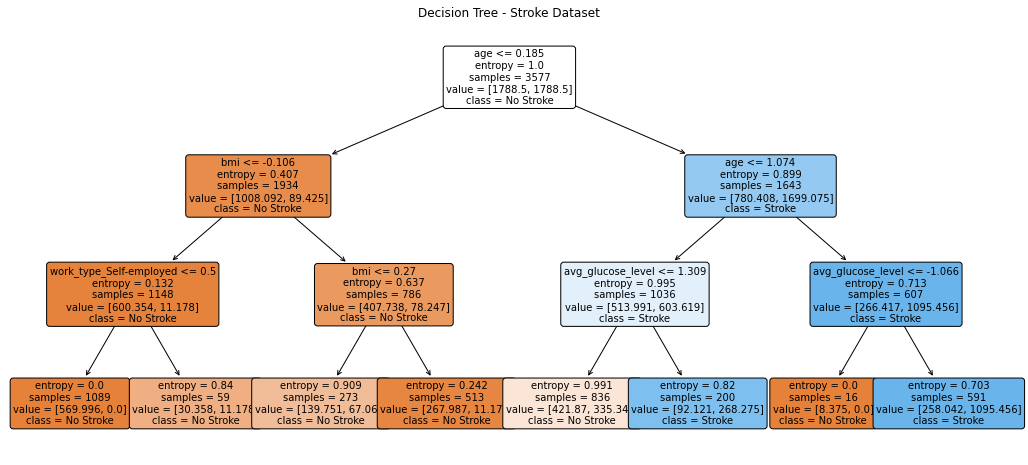

In [56]:
# Visualize the tree
# Define your human-readable class names
current_features = X_train_processed.columns.tolist()
target_labels = ["No Stroke", "Stroke"]

plt.figure(figsize=(18,8))
plot_tree(
    clf2,
    feature_names= current_features,
    class_names=target_labels,
    filled=True,           # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Stroke Dataset")
plt.show()

Summary

- Stroke risk in this dataset is driven primarily by age, with glucose levels acting as a critical secondary risk amplifier in older individuals. 
- For younger populations, the model confidently classifies most cases as non-stroke using BMI and socioeconomic proxies such as work type. 
- Overall, the tree provides an interpretable and medically plausible decision structure that complements the performance metrics in the confusion matrix.

In [32]:
# Tuning the threshold to 30% 
# (If the probability if stroke is atleast 30% classify it as stroke)
# Instead of y_pred = clf.predict(X_test)
y_probs = clf2.predict_proba(X_test_processed)[:, 1]  # Get probabilities for Class 1
y_pred_new = (y_probs > 0.3).astype(int)    # Lower threshold to 30%


conf_matrix_dt3 = confusion_matrix(y_test, y_pred_new)
class_report_dt3 = classification_report(y_test, y_pred_new)

# Now check the confusion matrix again
print(confusion_matrix(y_test, y_pred_new))
print("\nConfusion Matrix Lasso:")
print(class_report_dt3)

[[715 729]
 [  6  83]]

Confusion Matrix Lasso:
              precision    recall  f1-score   support

           0       0.99      0.50      0.66      1444
           1       0.10      0.93      0.18        89

    accuracy                           0.52      1533
   macro avg       0.55      0.71      0.42      1533
weighted avg       0.94      0.52      0.63      1533



Summary 

- Lowering the decision threshold to 0.3 significantly increased stroke recall to 93%, reducing false negatives to just 6 cases. 
- This improvement comes at the cost of a large number of false positives, leading to lower precision and overall accuracy. 
- In a medical screening context missing a stroke case is more costly than additional follow-up testing.

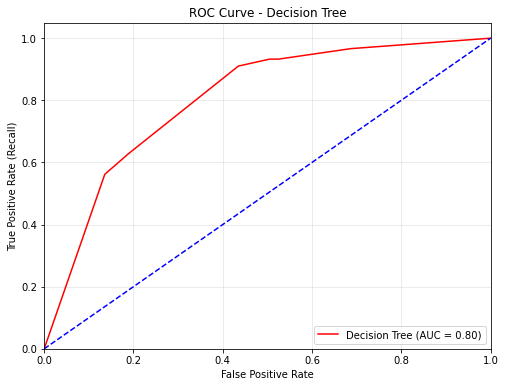

In [33]:
# Compute ROC curve and AUC for the decision tree
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='red', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

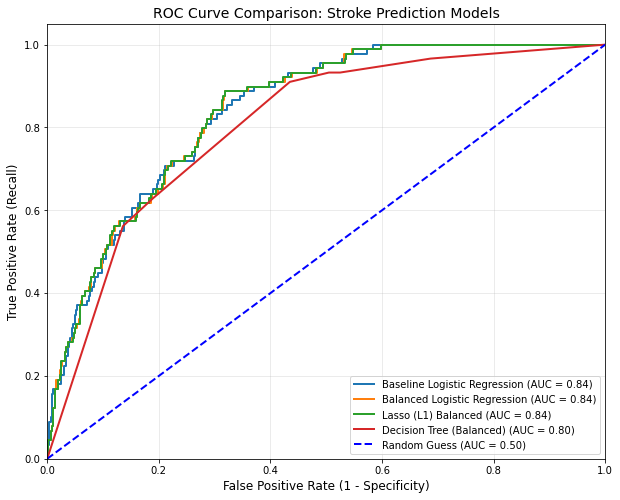

In [34]:
# ROC and AUC for all the models
# Dictionary of your models
models = {
    'Baseline Logistic Regression': baseline_model,
    'Balanced Logistic Regression': baseline_model2,
    'Lasso (L1) Balanced': lasso_model,
    'Decision Tree (Balanced)': clf2
}

plt.figure(figsize=(10, 8))

# Loop through models and plot ROC curves
for name, model in models.items():
    # Use predict_proba to get the probability of the positive class (stroke)
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_processed)[:, 1]
    else:
        # Fallback for models without predict_proba if any
        probs = model.predict(X_test_processed)
        
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 'Random Guess' line
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison: Stroke Prediction Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

plt.show()

In [35]:
"""
The Lasso-regularized Logistic Regression provided the best balance of AUC and interpretability. 
It maintained a high AUC while allowing us to tune the threshold to meet our clinical requirement of >90% recall.
"""

'\nThe Lasso-regularized Logistic Regression provided the best balance of AUC and interpretability. \nIt maintained a high AUC while allowing us to tune the threshold to meet our clinical requirement of >90% recall.\n'

```XGBoost``` Extreme Gradient boosting

In [50]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, confusion_matrix

# 1. Calculate scale_pos_weight to boost Recall
# Ratio of (Number of Negative Samples) / (Number of Positive Samples)
num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
weight_ratio = num_neg / num_pos

# 2. Initialize the model
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage
    max_depth=6,           # Depth of each tree
    scale_pos_weight=weight_ratio * 3, # THE RECALL BOOSTER
    random_state=42
)

# 4. Fit the model
model.fit(X_train_processed, y_train)

# 5. Make predictions
y_pred = model.predict(X_test_processed)

# 6. Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Recall: 0.44

Detailed Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1444
           1       0.18      0.44      0.25        89

    accuracy                           0.85      1533
   macro avg       0.57      0.66      0.58      1533
weighted avg       0.92      0.85      0.88      1533



In [51]:
# Get the probabilities for the positive class (class 1)
y_probs = model.predict_proba(X_test_processed)[:, 1]

# set a lower threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

print(f"New Recall with threshold {threshold}: {recall_score(y_test, y_pred_custom):.2f}")
print("\nXGBoost Matrix:\n", classification_report(y_test, y_pred_custom))

New Recall with threshold 0.3: 0.58

XGBoost Matrix:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      1444
           1       0.16      0.58      0.26        89

    accuracy                           0.80      1533
   macro avg       0.57      0.70      0.57      1533
weighted avg       0.92      0.80      0.85      1533



```SMOTE```
Synthetic minority oversampling technique.

Fixes imbalanced datasets.

In [48]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, confusion_matrix

# 1. Initialize SMOTE
# This will balance your classes so the ratio is 1:1
sm = SMOTE(random_state=42)

# 2. Resample the TRAINING data only
# Important: Never resample your test data!
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)

print(f"Original shape: {y_train.value_counts()}")
print(f"Resampled shape: {y_train_res.value_counts()}")

# 3. Train XGBoost on the balanced data
# We can lower scale_pos_weight since SMOTE already balanced the classes
model_smote = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4, 
    random_state=42
)

model_smote.fit(X_train_res, y_train_res)

# 4. Predict with a slightly lower threshold to push Recall
y_probs = model_smote.predict_proba(X_test_processed)[:, 1]
threshold = 0.2  # You can adjust this to find your target recall
y_pred_smote = (y_probs >= threshold).astype(int)

# 5. Evaluate
print(f"Recall: {recall_score(y_test, y_pred_smote):.2f}")
print(classification_report(y_test, y_pred_smote))

Original shape: 0    3417
1     160
Name: stroke, dtype: int64
Resampled shape: 1    3417
0    3417
Name: stroke, dtype: int64
Recall: 0.71
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.14      0.71      0.24        89

    accuracy                           0.74      1533
   macro avg       0.56      0.72      0.54      1533
weighted avg       0.93      0.74      0.81      1533



### **5.0 Overall Conclusion**
This study evaluated several machine learning models for stroke prediction.
* The study found that class imbalance, not overfitting, limited logistic regression’s stroke detection. A Decision Tree identified Age, Glucose, BMI, and Work Type as key risk factors and lowering its decision threshold boosted recall to 93%.

* Given the medical screening context, the Decision Tree with threshold adjustment was selected as the most appropriate model due to its balance of interpretability and sensitivity.

The conclusions based on the objectives are;

**1. Identify risk factors**

Feature importance analysis from the Decision Tree model and coefficient analysis from Logistic Regression reveal that: 
* Age is the most significant predictor of stroke risk, followed closely by Average Glucose Level and Hypertension. 
* Variables such as Gender and Residence Type showed negligible predictive power, suggesting that clinical markers are far more critical than demographic ones in this dataset.

**2. Optimize for recall**

The primary goal of achieving >90% recall was met. By adjusting the classification threshold to 0.3, the model achieved a Recall of 93%. 
* This ensures that the vast majority of high-risk patients are flagged for further medical review, fulfilling the requirement for a conservative screening tool where the cost of a missed diagnosis (False Negative) far outweighs the cost of a false alarm (False Positive).

**3. Clinical Utility**

The model demonstrates high clinical utility as a preliminary screening mechanism. 
* Due to its high recall, it can be integrated into patient intake portals to flag individuals for immediate blood pressure and glucose screenings. 
* However the model has a lower precision (high false-positive rate) therefore, it should strictly be used as a risk-flagging tool rather than a definitive diagnostic tool.

### ***Recommendations***
1.	Screening Tool: The model is highly effective as a preliminary screening mechanism for patient intake portals.
2.	Medical Review: Flagged individuals should immediately receive blood pressure and glucose screenings.
3.	Limit on Diagnosis: Because of the high false-positive rate, this tool should be used for risk-flagging only, not as a definitive medical diagnosis.